In [110]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop



In [121]:
X=np.linspace(1,10,200)

In [123]:
np.random.shuffle(X)

In [124]:
Y=3*X+5+np.random.randn(200,)

In [125]:
import matplotlib.pyplot as plt

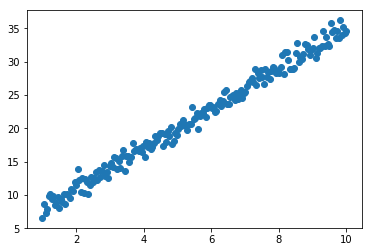

In [127]:
plt.figure()
plt.scatter(X,Y)

In [167]:
from keras.models import Model,load_model
from keras.layers import Dense,Dropout,Flatten,Input,Conv2D,MaxPool2D
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt

In [143]:
inp=Input(shape=(1,))
x=Dense(units=1)(inp)
model=Model(inp,x)
model.compile(optimizer='sgd',loss='mse')

In [144]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [145]:
history=model.fit(X[:160],Y[:160],validation_split=0.1,epochs=200,batch_size=20)

Train on 144 samples, validate on 16 samples
Epoch 1/200
144/144 [==============================] - 0s 1ms/step - loss: 49.9515 - val_loss: 4.5103
Epoch 2/200
144/144 [==============================] - 0s 104us/step - loss: 4.3989 - val_loss: 3.4568
Epoch 3/200
144/144 [==============================] - 0s 142us/step - loss: 4.0737 - val_loss: 3.3960
Epoch 4/200
144/144 [==============================] - 0s 120us/step - loss: 4.0980 - val_loss: 3.2030
Epoch 5/200
144/144 [==============================] - 0s 83us/step - loss: 3.8016 - val_loss: 3.3182
Epoch 6/200
144/144 [==============================] - 0s 72us/step - loss: 3.6090 - val_loss: 3.9436
Epoch 7/200
144/144 [==============================] - 0s 115us/step - loss: 3.5260 - val_loss: 3.5581
Epoch 8/200
144/144 [==============================] - 0s 132us/step - loss: 3.2827 - val_loss: 3.4238
Epoch 9/200
144/144 [==============================] - 0s 162us/step - loss: 3.1745 - val_loss: 2.6189
Epoch 10/200
144/144 [=========

In [146]:
model.evaluate(X[160:],Y[160:])

40/40 [==============================] - 0s 150us/step


0.9775403022766114

In [147]:
w,b=model.layers[1].get_weights()

In [153]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [154]:
X_train=X_train.reshape(X_train.shape[0],-1)/255
X_test=X_test.reshape(X_test.shape[0],-1)/255

In [155]:
Y_train=np_utils.to_categorical(Y_train,10)
Y_test=np_utils.to_categorical(Y_test,10)

In [161]:
inp=Input(shape=(784,))
x=Dense(32,activation='relu')(inp)
x=Dense(10,activation='softmax')(x)
model=Model(inp,x)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])



In [163]:
model.fit(X_train,Y_train,epochs=2,batch_size=4)

Epoch 1/2
60000/60000 [==============================] - 24s 405us/step - loss: 0.2609 - acc: 0.9226
Epoch 2/2
60000/60000 [==============================] - 22s 371us/step - loss: 0.1425 - acc: 0.9574


In [164]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 111us/step


[0.12513850409910082, 0.9623000025749207]

In [196]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [197]:
X_train=X_train.reshape(-1,28,28,1)/255
X_test=X_test.reshape(-1,28,28,1)/255


In [198]:
Y_train=np_utils.to_categorical(Y_train,10)
Y_test=np_utils.to_categorical(Y_test,10)

In [199]:
from keras.optimizers import Adam

In [200]:
inp=Input(shape=(28,28,1))
x=Conv2D(kernel_size=(5,5),filters=32,strides=1,padding='same')(inp)
x=MaxPool2D(pool_size=(2,2),strides=2,padding='same')(x)
x=Conv2D(kernel_size=(5,5),filters=64,strides=1,padding='same')(x)
x=MaxPool2D(pool_size=(2,2),strides=2,padding='same')(x)
x=Flatten()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(10,activation='softmax')(x)
model=Model(inp,x)
adam=Adam(lr=0.0001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [201]:
model.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 1024)              321

In [202]:
model.fit(X_train,Y_train)

Epoch 1/1
60000/60000 [==============================] - 225s 4ms/step - loss: 0.2036 - accuracy: 0.9437


In [203]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 10s 992us/step


[0.06203326836451888, 0.9800000190734863]